<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/images/bogdanoff_cover.jpeg" height="150">

# Андан на экономе: домашнее задание 2
</center>


> [He bought? Dump it. He sold? Pump it.](https://www.youtube.com/watch?v=fDpYZU5FAVU)  <br>

$\qquad$ $\qquad$ $\qquad$ $\qquad$  📉 📉 📉**Bogdanoff**


**ФИО:** Иванов Андрей Александрович

## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 24.03.2024

__Жесткий дедлайн:__ 23:59MSK 31.03.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [112]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

#  Портфельная теория Марковица

В этом задании мы будем работать с данными по ценным бумагам. Мы немного поанализируем их и попробуем собрать оптимальный портфель.

- в таблице `stocks.csv` содержится информация об акциях нескольких компаний с $01.01.2014$ по $31.12.2023$ по дням.
- таблице `exchange_rates.csv` содержится информация о курсах валют _USD-RUB_, _EUR-RUB_ и _HKD-RUB_ за тот же период.

Подгрузим данные и посмотрим на них.

In [113]:
df_stocks = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/stocks.csv')
print(df_stocks.shape)
df_stocks.head()

(17572, 8)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,29.12.2023,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,28.12.2023,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,27.12.2023,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,26.12.2023,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,22.12.2023,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [114]:
df_rates = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/exchange_rates.csv')
print(df_rates.shape)
df_rates.head()

(3652, 4)


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,01.01.2014,"45,189","32,855","4,237"
1,02.01.2014,"45,254","33,1","4,269"
2,03.01.2014,"45,114","33,2","4,282"
3,04.01.2014,"45,125","33,248","4,288"
4,05.01.2014,"45,228","33,255","4,289"


## 1 Причешем данные

Часто при загрузке данных из каких-либо источников, особенно если они разные, у вас будет возникать необходимость в их форматировании. Поэтому в этой части потренируемся корректировать переменные для последующей работы с ними.


__а) [2 балла]__ В колонке `'Дата'` лежат дни, в которые осуществлялась торговля акциями. Превратите её в формат `datetime` в обеих таблицах.

In [115]:
df_stocks['Дата'] = pd.to_datetime(df_stocks['Дата'], format='%d.%m.%Y')
df_rates['Дата'] = pd.to_datetime(df_rates['Дата'], format='%d.%m.%Y')

__б) [5 баллов]__ Для продолжения работы необходимо перевести столбцы в числовой формат, однако они содержат некорректные символы, которые не позволят сделать это напрямую.

Допишите функцию, которая примет на вход тип данных `string` и:

- Уберет лишнюю точку, разделяющую тысячные разряды в числах (например, $2.024,01 \rightarrow 2024,01$)
- Заменит символ запятой, отделяющий десятичный разряд, на точку (например, $2024,01 \rightarrow 2024.01$)
- Уберет символы `%`, `'B'` (млрд), `'M'` (млн) и `'K'` (тыс)
- Затем изменит тип данных с `string` на `float`
- И домножит на $10^9$, если в исходном значении содержалась `'B'`, на $10^6$, если `'M'`, или на $10^3$, если `'K'`.

In [116]:
def correct_values(value: str):
    corrected_value = value.rstrip('%')
    corrected_value = corrected_value.replace('.', '')
    corrected_value = corrected_value.replace(',', '.')
    if 'B' in corrected_value:
        corrected_value = float(corrected_value[:-1]) * 10**9
    elif 'M' in corrected_value:
        corrected_value = float(corrected_value[:-1]) * 10**6
    elif 'K' in corrected_value:
        corrected_value = float(corrected_value[:-1]) * 10**3
    else:
        corrected_value = float(corrected_value)

    return corrected_value

Примените данную функцию к столбцам `'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'` таблицы `df_stocks` и к столбцам `'EUR_RUB', 'USD_RUB', 'HKD_RUB'` таблицы `df_rates`.

__Hint:__ Для этого можно использовать метод `map` библиотеки `pandas`. Важно также указать параметр `na_action='ignore'`, чтобы пустые значения не передавались в функцию `correct_values`, [(ссылка на документацию).](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

In [117]:
df_stocks['Цена'] = df_stocks['Цена'].map(correct_values, na_action='ignore')
df_stocks['Откр.'] = df_stocks['Откр.'].map(correct_values, na_action='ignore')
df_stocks['Макс.'] = df_stocks['Макс.'].map(correct_values, na_action='ignore')
df_stocks['Мин.'] = df_stocks['Мин.'].map(correct_values, na_action='ignore')
df_stocks['Объём'] = df_stocks['Объём'].map(correct_values, na_action='ignore')
df_stocks['Изм. %'] = df_stocks['Изм. %'].map(correct_values, na_action='ignore')
df_rates['EUR_RUB'] = df_rates['EUR_RUB'].map(correct_values, na_action='ignore')
df_rates['USD_RUB'] = df_rates['USD_RUB'].map(correct_values, na_action='ignore')
df_rates['HKD_RUB'] = df_rates['HKD_RUB'].map(correct_values, na_action='ignore')

__в) [5 баллов]__ Поскольку акции компаний торгуются на разных биржах, цены также указаны в различных валютах.
Давайте приведем все к рублям, используя таблицу `df_rates`. Для этого важно знать, что данные по тикерам:

- `'AAPL'` и `'MSFT'` собраны в долларах `USD`
- `'MBGn'` и `'BMWG'` $-$ в евро `EUR`
- `'Tencent'` $-$ в Гонконгских долларах `HKD`
- по остальным $-$ в `RUB`

Давайте сначала объединим таблицы, выполнив операцию `left join` таблицы `df_stocks` с `df_rates` по столбцу `'Дата'`. Для этого будем использовать метод `merge`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [309]:
df_merged = df_stocks.merge(df_rates, on='Дата', how='left')

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,192.53,193.90,194.40,191.73,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,193.58,194.14,194.66,193.17,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,193.15,192.49,193.50,191.09,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,193.05,193.61,193.89,192.83,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,193.60,195.18,195.41,192.97,37150000.0,-0.55,AAPL,101.467,92.00,11.791


 Затем преобразуем столбцы `'Цена', 'Откр.', 'Макс.', 'Мин.'`, умножив их на соответствующий данной акции курс.

In [310]:
stocks_currency_dict = {
    "AAPL": "USD_RUB",
    "MSFT": "USD_RUB",
    "MBGn": "EUR_RUB",
    "BMWG": "EUR_RUB",
    "Tencent": "HKD_RUB",}

for ticker, curr_pair in stocks_currency_dict.items():
    currency_rate = df_merged[curr_pair].loc[df_merged['Тикер'] == ticker].values[0]
    df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']] *= currency_rate

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.0108,17520.8040,17565.9840,17324.7228,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,17491.8888,17542.4904,17589.4776,17454.8412,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,17453.0340,17393.3964,17484.6600,17266.8924,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,17443.9980,17494.5996,17519.9004,17424.1188,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,17493.6960,17636.4648,17657.2476,17436.7692,37150000.0,-0.55,AAPL,101.467,92.00,11.791


Наконец, мы закончили с первичными преобразованиями и можем приступать к дальнейшему анализу.

## 2 Начало работы с данными

__а) [2 балла]__ Посмотрите наличие пропусков в данных таблицы `df_merged`. Информация по каким тикерам и за какой период отсутствует? Удалите строки с пропущенными данными.

In [311]:
rows_with_missing_values = df_merged[df_merged.isnull().any(axis=1)]
rows_with_missing_values


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
1974,2016-02-27,8760.40200,8760.40200,8760.40200,8760.40200,NaN,300.12,AAPL,83.492,76.754,9.891
2800,2022-11-21,8242.62560,8273.19036,8311.64280,8235.72388,NaN,-0.65,BMWG,62.146,60.850,7.849
2944,2022-05-03,7885.70808,7711.19316,7885.70808,7677.67052,NaN,3.01,BMWG,71.834,70.960,8.697
2945,2022-05-02,7654.99344,7664.85304,7734.85620,7331.59856,NaN,-1.11,BMWG,74.197,73.440,9.006
7838,2022-11-21,6104.07836,6081.40128,6159.29212,6068.58380,NaN,-0.50,MBGn,62.146,60.850,7.849
7981,2022-05-04,6145.48868,6208.59012,6238.16892,6141.54484,NaN,-0.87,MBGn,70.228,66.300,8.425
7982,2022-05-03,6199.71648,6144.50272,6200.70244,6073.51360,NaN,1.06,MBGn,71.834,70.960,8.697
7988,2022-04-25,6293.38268,6283.52308,6349.58240,6207.60416,NaN,-1.39,MBGn,81.178,73.125,9.560
17313,2015-01-17,1417.19600,1417.19600,1417.19600,1417.19600,NaN,4.82,Tencent,75.166,64.942,8.368


In [312]:
df_merged.dropna(inplace=True)

__б) [2 балла]__ Какое количество уникальных тикеров содержится в таблице `df_stocks`?

In [313]:
df_stocks['Тикер'].nunique()

7

__в) [2 балла]__  Для каких акций и в какой временной период была зафиксирована наибольшая разность между значениями `'Макс.'` и `'Мин.'` в рублях?

In [314]:
df_merged_1 = df_merged.copy()

In [315]:
df_merged_1['Разница_Макс_Мин'] = df_merged_1['Макс.'] - df_merged_1['Мин.']
df_merged_1.sort_values(by='Разница_Макс_Мин', ascending=False)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,Разница_Макс_Мин
10205,2023-07-18,32483.516400,31249.198800,33142.240800,30918.481200,6.452000e+07,3.98,MSFT,102.184,90.900,11.613,2223.759600
10554,2022-02-24,26619.152400,24624.003600,26670.657600,24534.547200,5.699000e+07,5.11,MSFT,95.207,84.048,10.764,2136.110400
11046,2020-03-13,14351.878800,13328.100000,14630.187600,12716.362800,9.273000e+07,14.22,MSFT,80.687,72.613,9.301,1913.824800
10576,2022-01-24,26779.993200,26403.192000,26846.859600,24943.878000,8.604000e+07,0.11,MSFT,89.234,78.786,10.090,1902.981600
10394,2022-10-13,21165.926400,19865.646000,21333.996000,19800.586800,4.255000e+07,3.76,MSFT,63.196,63.630,8.153,1533.409200
...,...,...,...,...,...,...,...,...,...,...,...,...
12855,2023-01-10,0.016365,0.016400,0.016440,0.016300,1.733000e+10,-0.58,VTBR,74.824,69.800,8.922,0.000140
12842,2023-01-27,0.016585,0.016555,0.016685,0.016545,2.180000e+10,-0.09,VTBR,75.814,69.460,9.034,0.000140
12881,2022-12-02,0.016830,0.016915,0.016915,0.016790,1.454000e+10,-0.62,VTBR,65.875,62.000,8.024,0.000125
12884,2022-11-29,0.016915,0.016910,0.016950,0.016835,1.304000e+10,0.39,VTBR,62.816,61.022,7.788,0.000115


__г) [2 балла]__  В какие периоды было продано/куплено акций на наибольшую сумму рублей. Какие это были акции?

__Hint__: Объем — это количество проданных/купленных акций

In [316]:
df_merged_1['Сумма_руб'] = df_merged_1['Объём'] * df_merged_1['Цена']
df_merged_1.sort_values(by='Сумма_руб', ascending=False)

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,Разница_Макс_Мин,Сумма_руб
843,2020-08-24,11372.70960,11629.33200,11636.56080,11199.21840,3.459400e+08,1.20,AAPL,87.965,74.640,9.610,437.34240,3.934275e+12
844,2020-08-21,11238.07320,10776.33360,11283.25320,10775.43000,3.380500e+08,5.15,AAPL,88.214,74.800,9.644,507.82320,3.799031e+12
834,2020-09-04,10929.94560,10849.52520,11177.53200,10020.02040,3.326100e+08,0.07,AAPL,89.250,75.409,9.703,1157.51160,3.635409e+12
859,2020-07-31,9601.65360,9296.23680,9616.11120,9110.99880,3.743000e+08,10.47,AAPL,87.555,74.411,9.576,505.11240,3.593899e+12
858,2020-08-03,9843.81840,9776.95200,10087.79040,9748.94040,3.081500e+08,2.52,AAPL,86.018,73.115,9.412,338.85000,3.033373e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13777,2019-04-19,0.03581,0.03602,0.03610,0.03580,4.910000e+09,-0.56,VTBR,72.047,64.052,8.162,0.00030,1.758271e+08
14025,2018-04-28,0.05270,0.05257,0.05272,0.05235,2.650000e+09,0.25,VTBR,75.692,62.263,7.887,0.00037,1.396550e+08
14258,2017-05-29,0.06600,0.06640,0.06650,0.06577,1.840000e+09,-0.56,VTBR,63.095,56.486,7.248,0.00073,1.214400e+08
14198,2017-08-22,0.05940,0.05947,0.05955,0.05924,1.990000e+09,0.25,VTBR,69.510,59.087,7.548,0.00031,1.182060e+08


__д) [5 баллов]__  В столбике `'Изм. %'` лежат изменения стоимости ценных бумаг в процентах. При этом для каждой бумаги валюта своя.

Найдите 5 дат, в которые наблюдались наибольшие средние процентные изменения стоимости акций в абсолютном выражении.

__Hint:__ От изменения акций надо взять модуль, а затем посчитать среднее по тикерам для каждой даты.

In [317]:
df_merged_1['Абс. изм. %'] = df_merged_1['Изм. %'].abs()

average_changes = df_merged_1.groupby('Дата')['Абс. изм. %'].mean()
top_5_dates = average_changes.nlargest(5)
top_5_dates

Дата
2022-02-24    13.081429
2016-02-29    11.840000
2020-03-24    10.795714
2020-03-12    10.615714
2022-02-21     9.128000
Name: Абс. изм. %, dtype: float64

__е) [2 балла]__ Сохраните ответ в переменную `top_5_diff` в виде таблички:

| Дата     | Изм. % |
|----------|--------|
| 01/01/01 |   1   |
|    ...   |  ...  |
| 03/01/01 |   3   |

In [318]:
top_5_diff = top_5_dates.to_frame().reset_index()
top_5_diff.columns = ['Дата', 'Изм. %']
top_5_diff

,Дата,Изм. %
0,2022-02-24,13.081429
1,2016-02-29,11.840000
2,2020-03-24,10.795714
3,2020-03-12,10.615714
4,2022-02-21,9.128000


__ё) [5 баллов]__ Далее мы будем работать только со средними ценами, поэтому имеет смысл перевести таблицу из длинного формата в широкий

Было:

| Дата     | Цена | Тикер |
|----------|------|-------|
| 01/01/01 |  10  |   A   |
| 02/01/01 |  20  |   A   |
| 03/01/01 |  30  |   A   |
|   ...    | ...  |  ...  |
| 01/01/01 |  15  |   B   |
| 02/01/01 |  30  |   B   |
| 03/01/01 |  60  |   B   |
|   ...    | ...  |  ...  |

Станет:

| Дата     | Цена A | Цена B | ... |
|----------|--------|--------|-----|
| 01/01/14 |   10   |   15   | ... |
| 02/01/14 |   20   |   30   | ... |
| 03/01/14 |   30   |   60   | ... |
|   ...    |  ...   |  ...   | ... |


Это можно сделать по-разному, например, с помощью `pivot_table` ([ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) на документацию)

In [327]:
df = df_merged.pivot_table(index='Дата', columns='Тикер', values='Цена')
df

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,1784.6100,8236.70984,NaN,6078.44340,3357.7776,1119.12768,NaN
2014-01-03,1745.7552,8280.09208,NaN,6086.33108,3335.1876,1095.81252,NaN
2014-01-06,1755.6948,8182.48204,135.47,6067.59784,3264.7068,1099.35551,0.048460
2014-01-07,1743.0444,8237.69580,NaN,6152.39040,3290.0076,1095.81252,NaN
2014-01-08,1753.8876,8326.43220,137.33,6133.65716,3231.2736,1112.49886,0.047910
...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,161.09,NaN,NaN,NaN,0.023195
2023-12-26,17443.9980,NaN,161.00,NaN,33854.2776,NaN,0.023160
2023-12-27,17453.0340,9899.03840,159.86,6179.01132,33800.9652,3257.26500,0.022875


__ж) [5 баллов]__  Для всех тикеров из таблички `df` постройти картинки с динамикой цен во времени, а также нистограммы цен. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы?

__Ответ:__ 

1) Нормальное распределение наблюдается у BMWG и MBGn, у GAZP и MSFT скорее тоже, а у AAPL, Tencent и VTBR - точно нет

2) Про кризисы точно можно сказать, что они были: 2020 и 2022. Про тренды говорить очень странно, потому что мы смотрим на цены иностранных акций в рублях, а это нам будет говорить, в первую очередь, про падение рубля, а не изменение цен акций. Но, кажется, они в основном росли, за исключением кризисов 2020 и 2022


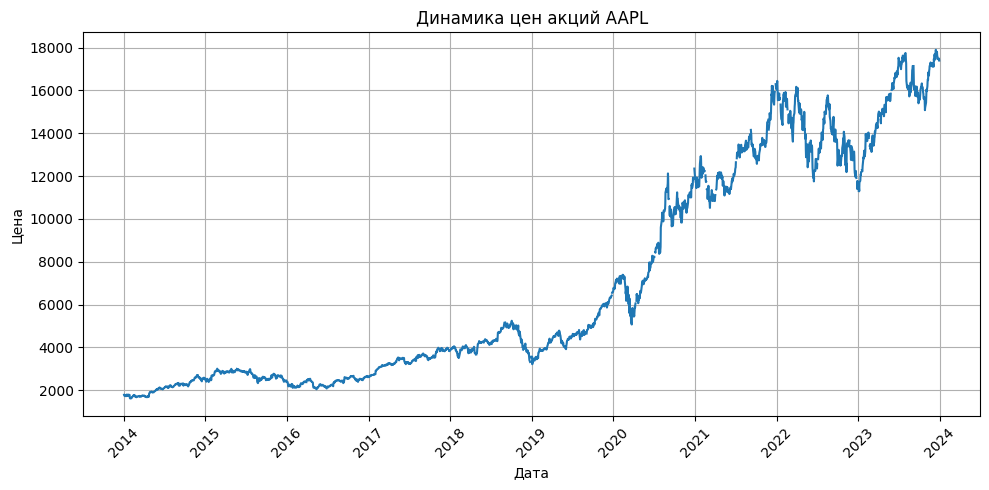

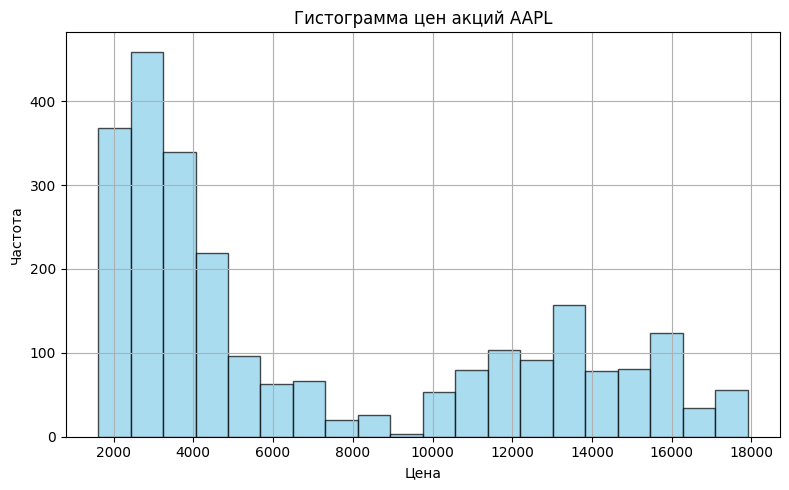

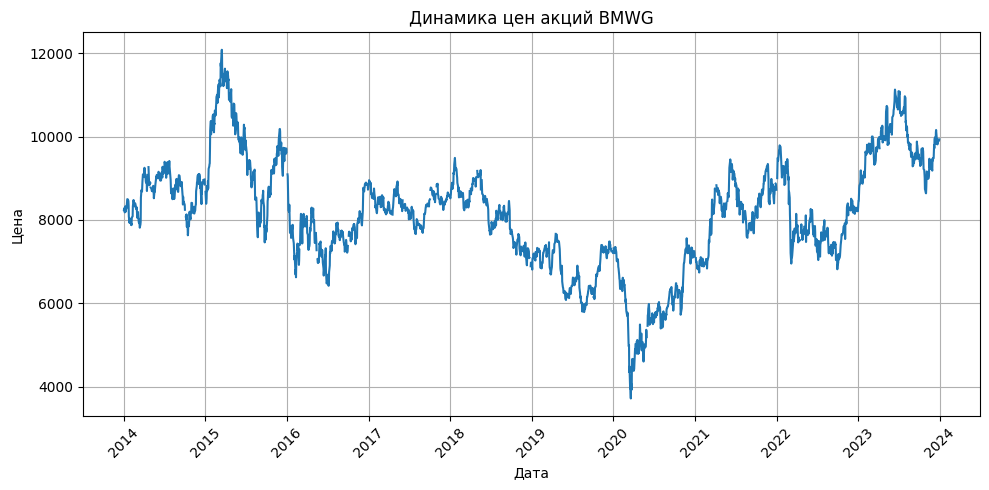

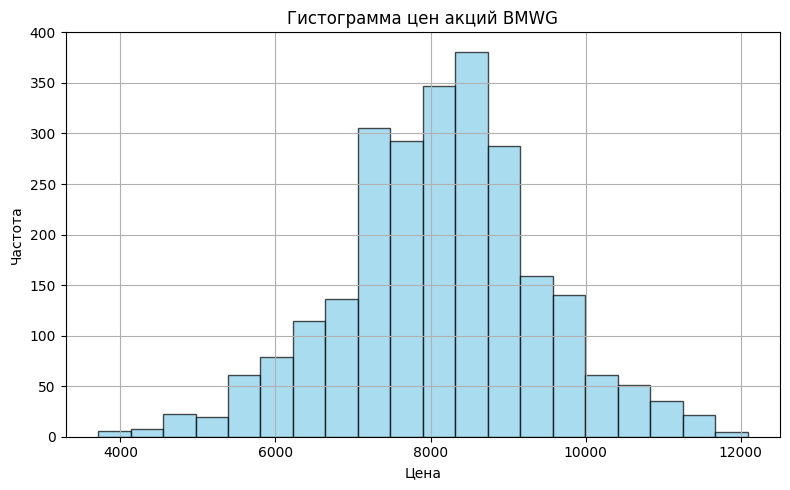

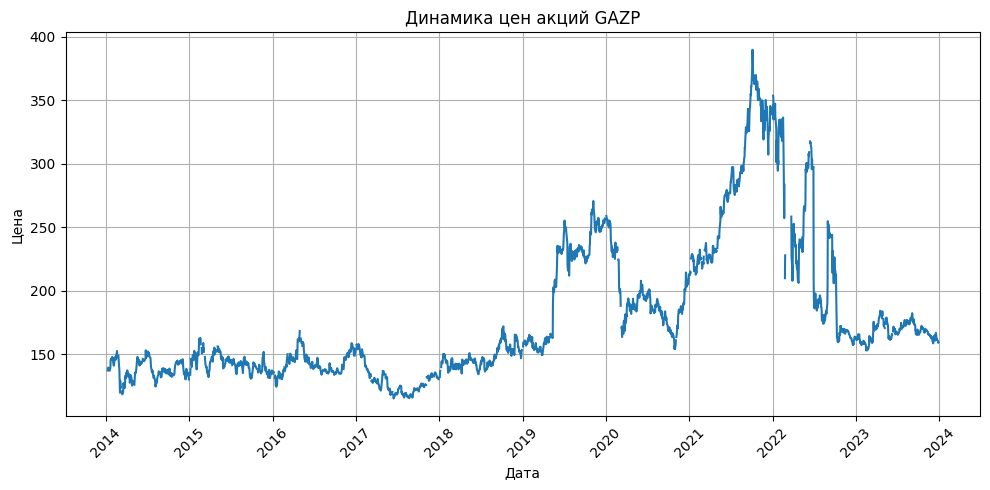

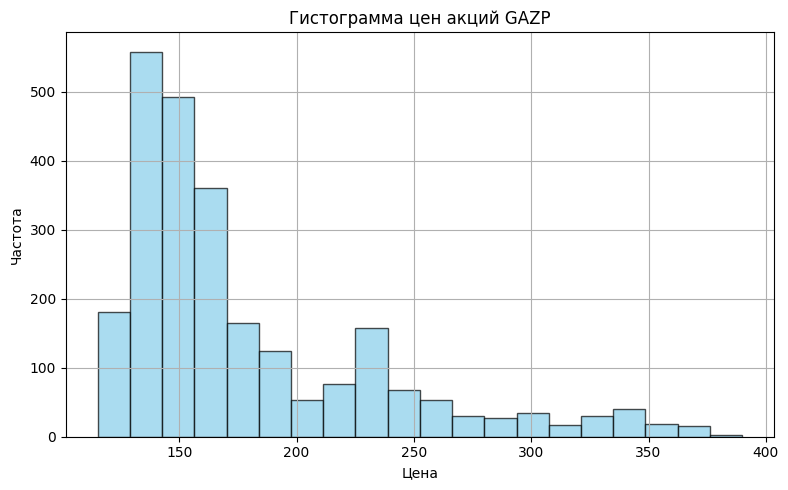

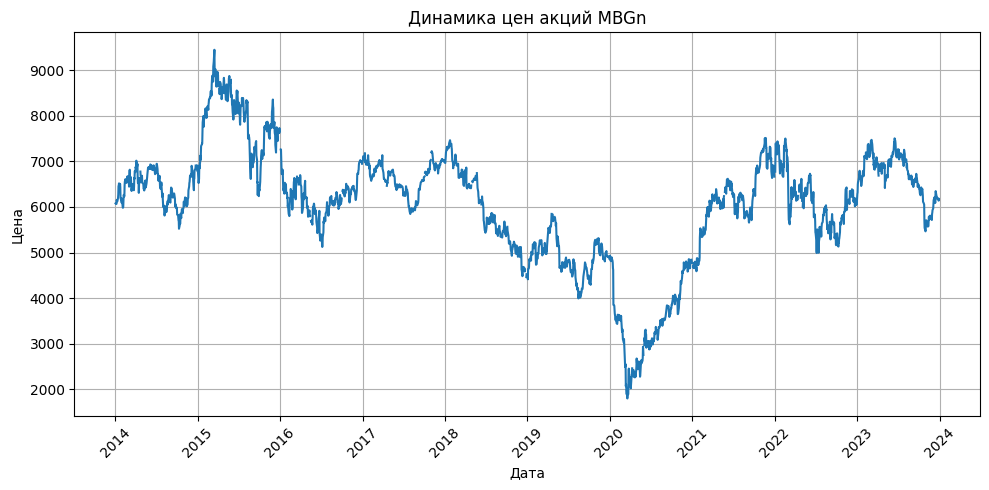

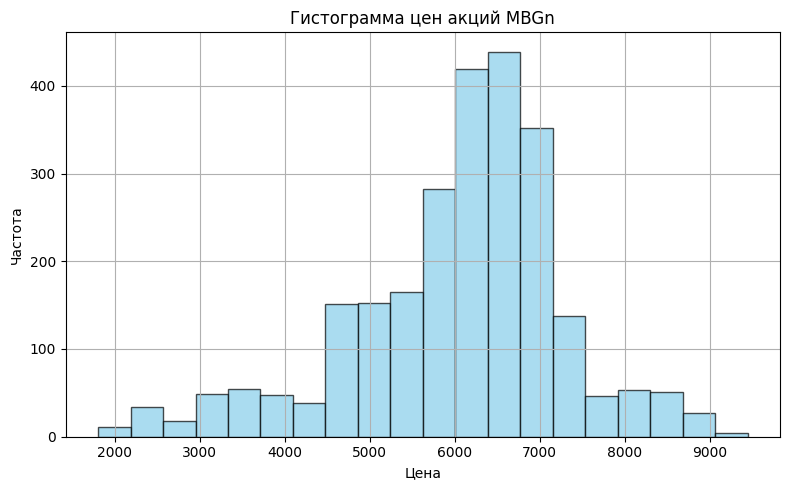

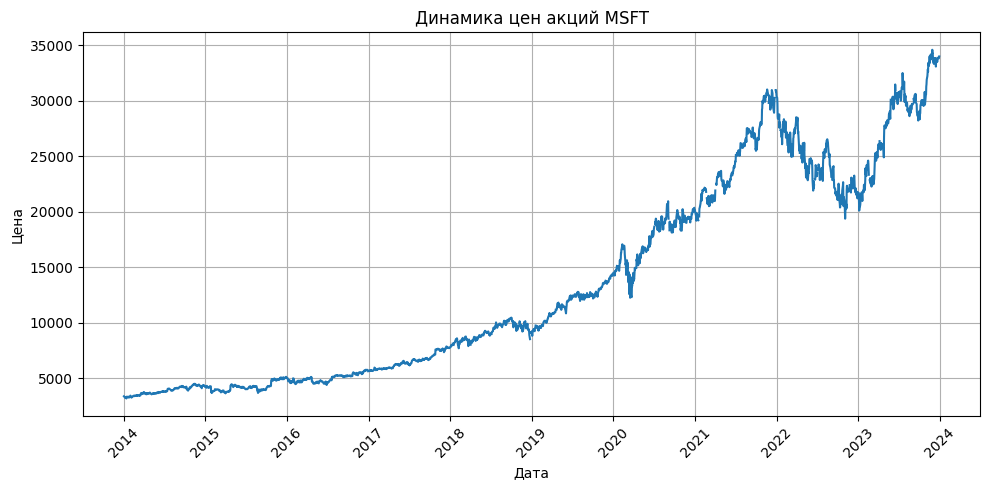

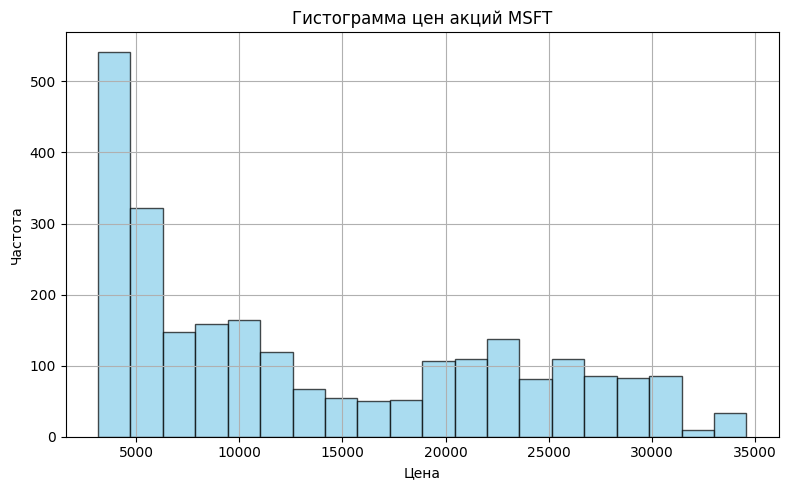

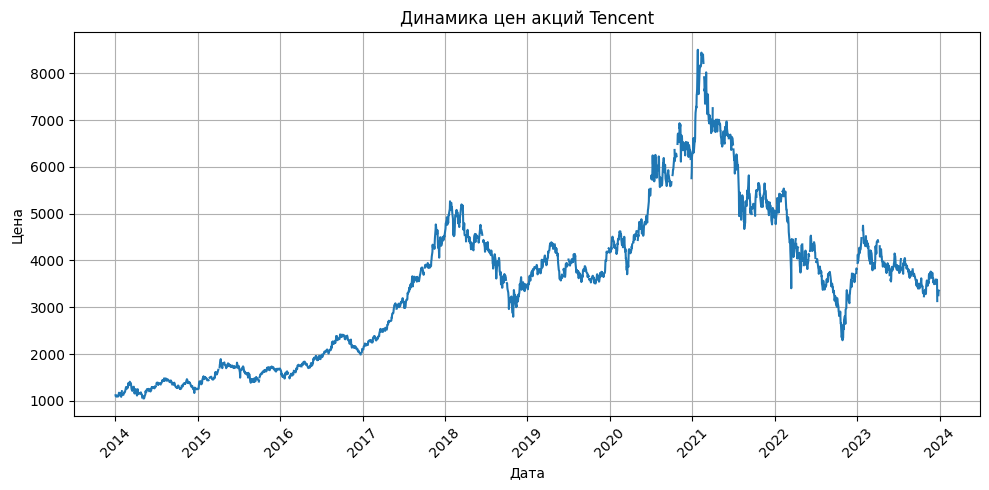

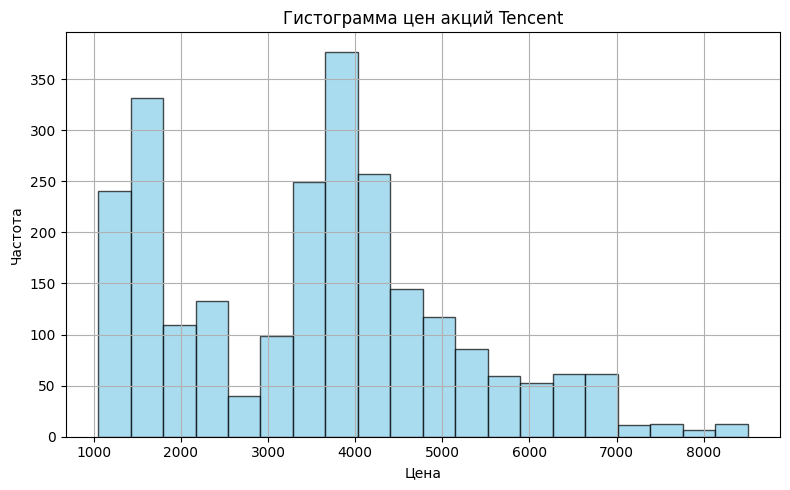

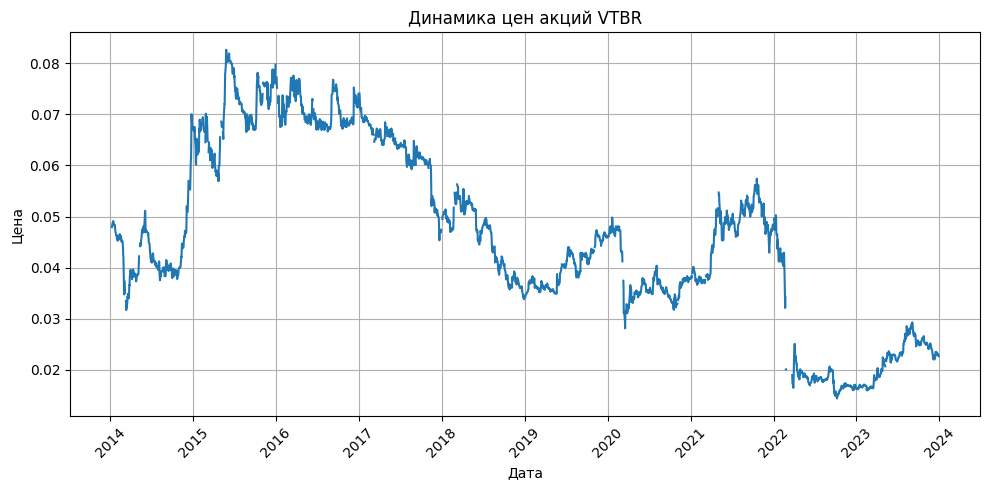

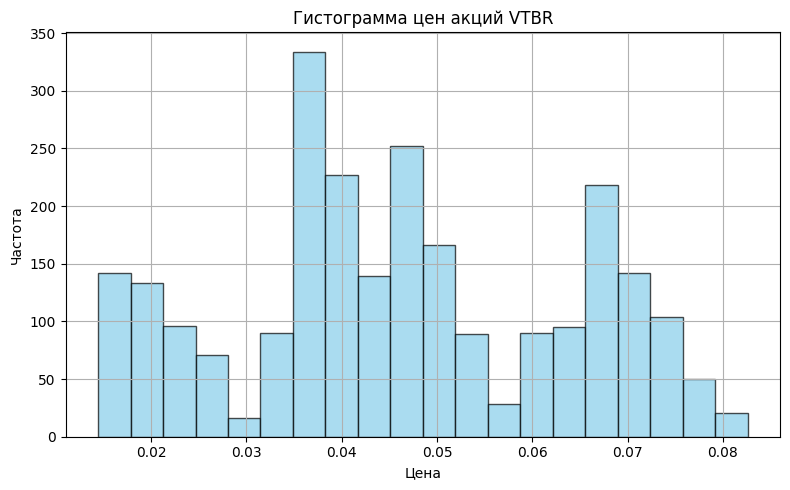

In [320]:
for ticker in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[ticker])
    plt.title(f'Динамика цен акций {ticker}')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 5))
    plt.hist(df[ticker], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Гистограмма цен акций {ticker}')
    plt.xlabel('Цена')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени:

$$
R_t = \left( \frac{P_t}{P_{t-1}} - 1 \right) \cdot 100\%.
$$

Под риском обычно имеют в виду стандартное отклонение.


__з) [5 баллов]__  Рассчитайте процентное изменение цены акций в рублях ото дня ко дню для `df`. Полученную таблицу доходностей сохраните в переменную `df_pct_change`.

__Hint__: С этим поможет метод `pct_change()`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

In [321]:
df

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,1784.6100,8236.70984,NaN,6078.44340,3357.7776,1119.12768,NaN
2014-01-03,1745.7552,8280.09208,NaN,6086.33108,3335.1876,1095.81252,NaN
2014-01-06,1755.6948,8182.48204,135.47,6067.59784,3264.7068,1099.35551,0.048460
2014-01-07,1743.0444,8237.69580,NaN,6152.39040,3290.0076,1095.81252,NaN
2014-01-08,1753.8876,8326.43220,137.33,6133.65716,3231.2736,1112.49886,0.047910
...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,161.09,NaN,NaN,NaN,0.023195
2023-12-26,17443.9980,NaN,161.00,NaN,33854.2776,NaN,0.023160
2023-12-27,17453.0340,9899.03840,159.86,6179.01132,33800.9652,3257.26500,0.022875


In [322]:
df_pct_change = df.pct_change() * 100
df_pct_change


Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-2.177215,0.526694,NaN,0.129765,-0.672766,-2.083333,NaN
2014-01-06,0.569358,-1.178852,NaN,-0.307792,-2.113248,0.323321,NaN
2014-01-07,-0.720535,0.674780,0.000000,1.397465,0.774979,-0.322279,0.000000
2014-01-08,0.622084,1.077199,1.372998,-0.304487,-1.785224,1.522737,-1.134957
...,...,...,...,...,...,...,...
2023-12-25,0.000000,0.000000,-0.616941,0.000000,0.000000,0.000000,0.957563
2023-12-26,-0.284091,0.000000,-0.055869,0.000000,0.021357,0.000000,-0.150895
2023-12-27,0.051800,-0.238474,-0.708075,-0.286396,-0.157476,4.014599,-1.230570


In [323]:
df_pct_change.iloc[550:570]

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2016-02-15,0.000000,4.013664,1.622239,3.102939,0.000000,3.679654,1.875902
2016-02-16,2.808511,-0.355774,1.813685,-0.748408,1.168317,0.790337,-0.198300
2016-02-17,1.531457,3.529250,0.920132,4.059041,2.603249,-0.784140,1.220551
2016-02-18,-1.875255,-0.053057,0.656455,-0.215850,-0.438764,2.960036,3.126753
2016-02-19,-0.249273,-2.017253,-0.797101,-2.085909,-0.708948,-0.767615,-1.155676
2016-02-20,0.000000,0.000000,-0.226443,0.000000,0.000000,0.000000,-0.536451
2016-02-22,0.874636,1.855614,2.423311,1.609594,1.601698,0.350288,1.369105
2016-02-23,-2.270851,-2.739362,0.000000,-2.391676,-2.792023,0.145444,0.000000
2016-02-24,1.478665,-4.019688,-1.965690,-4.089101,0.351700,-1.060199,-2.114598


__и) [5 баллов]__  Для всех тикеров из таблички `df_pct_change` постройти картинки с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение?
- Видно ли по ящику с усами, что в данных довольно много выбросов?

__Ответ:__ 

1) Все доходности имеют нормальное распределение.

2) По количеству точек в ящиках в усами видно, что в данных много выбросов.

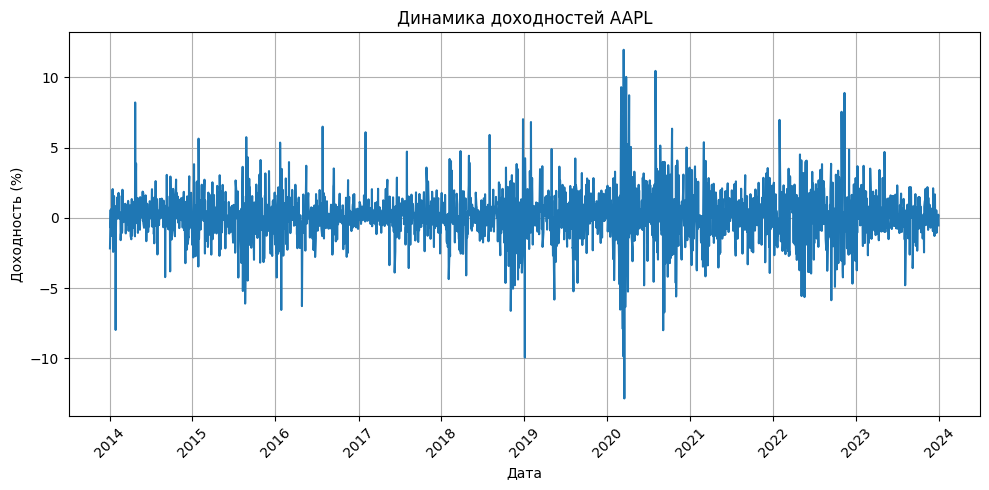

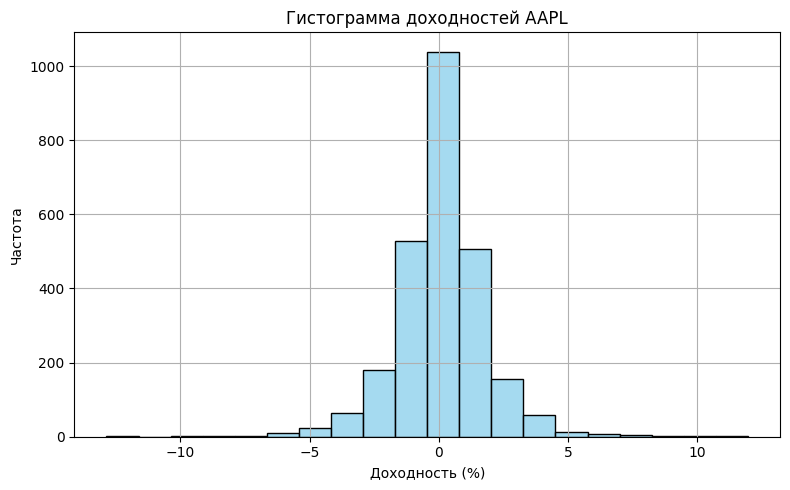

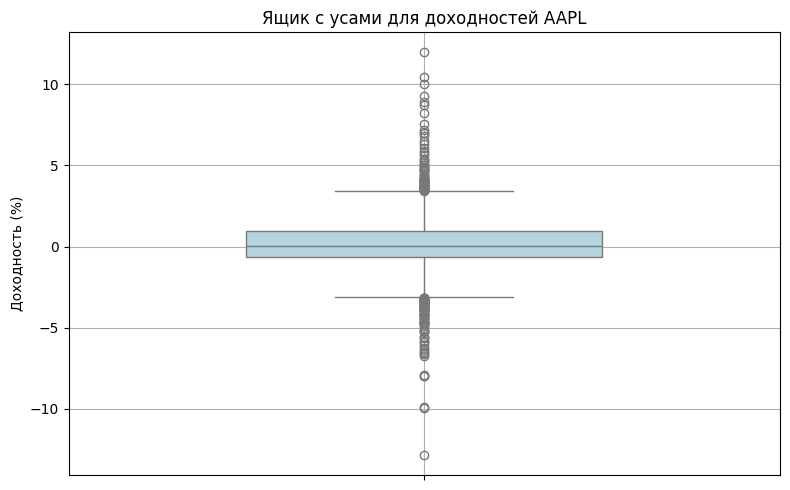

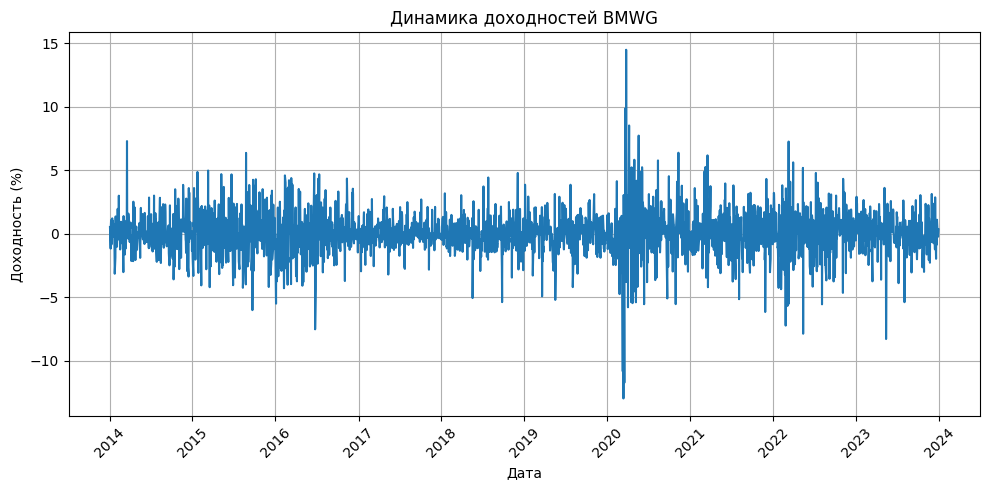

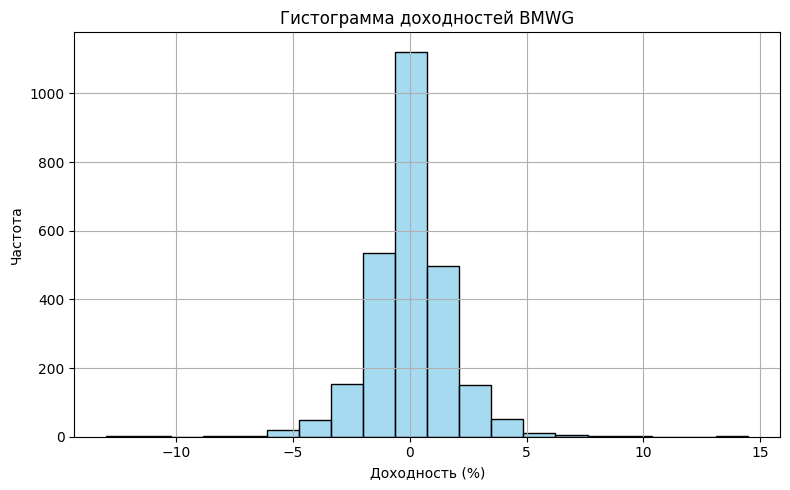

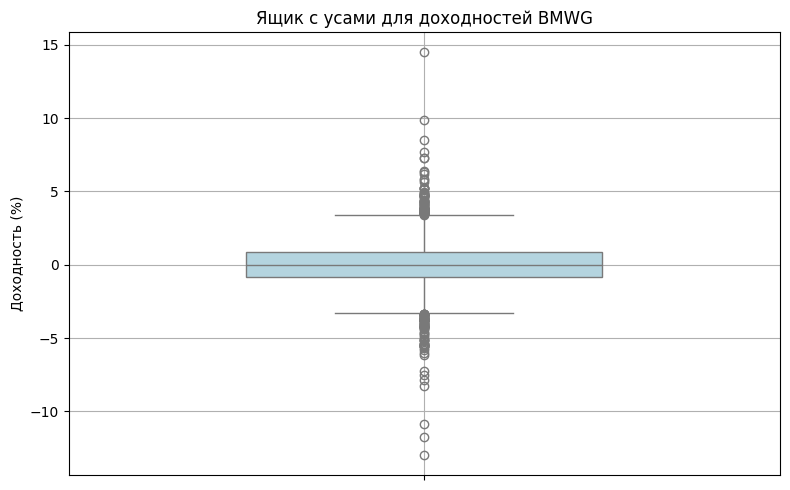

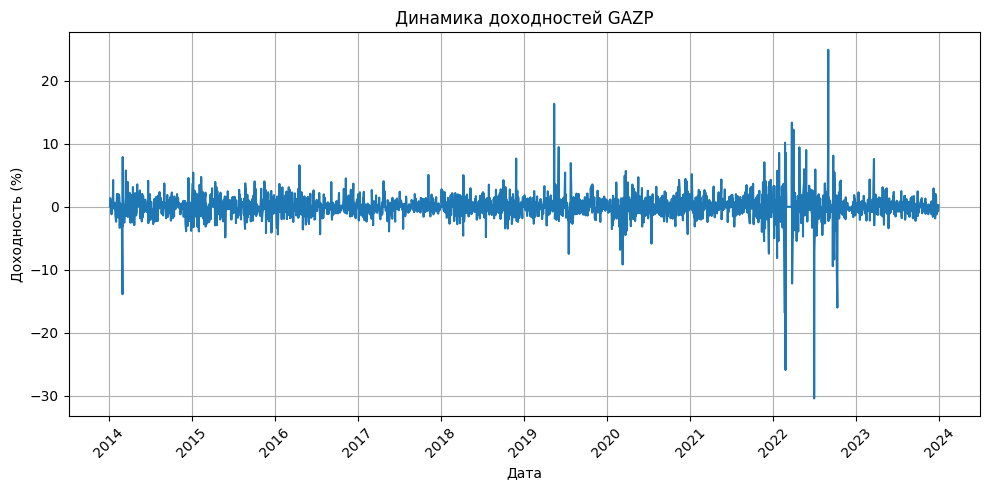

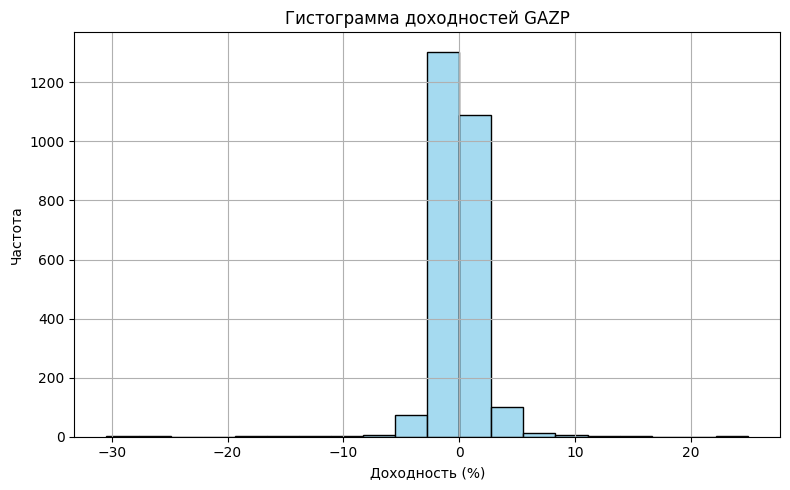

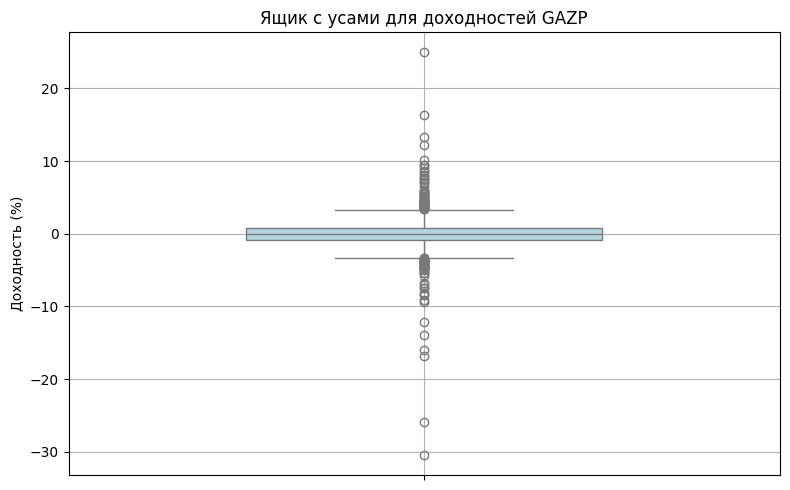

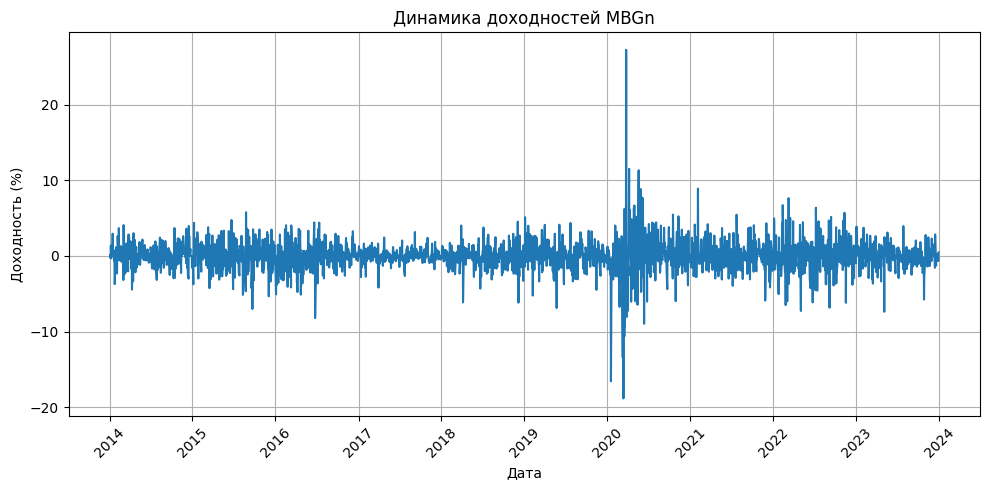

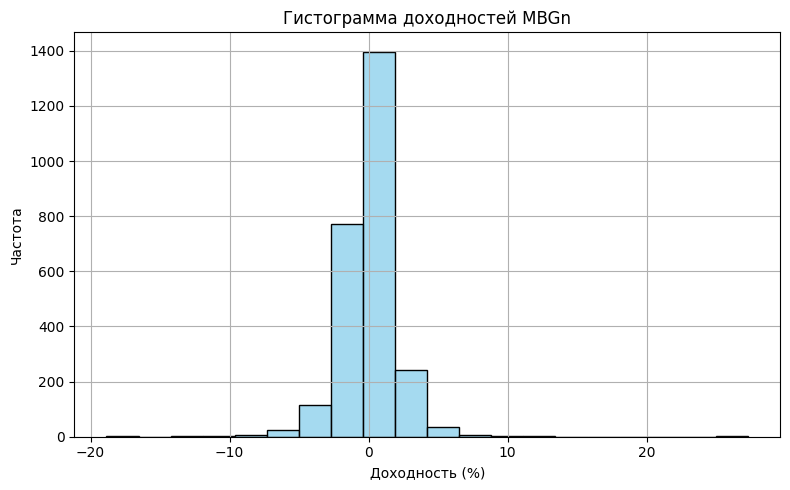

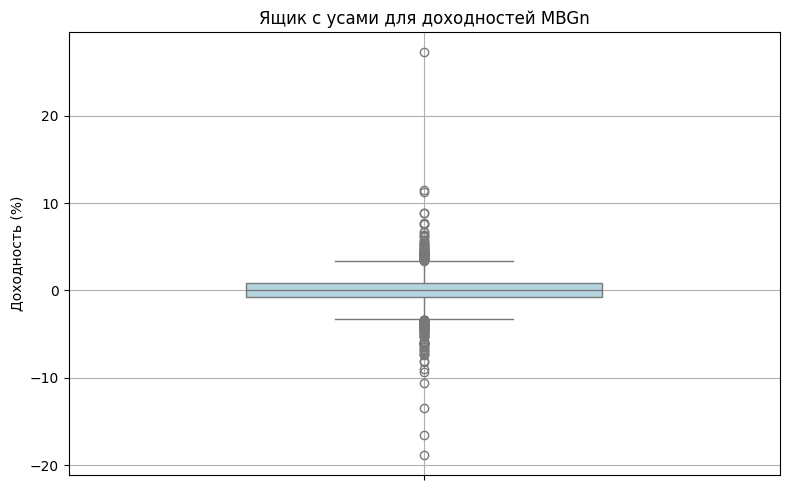

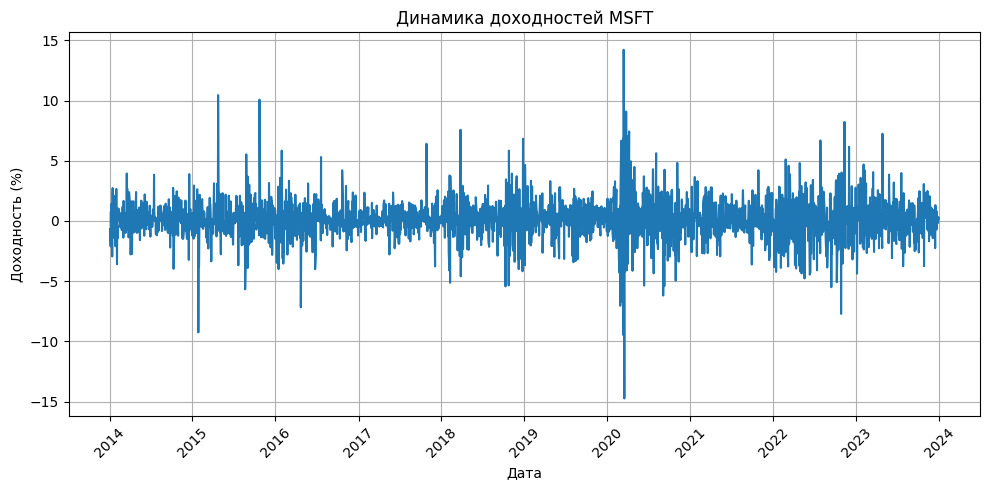

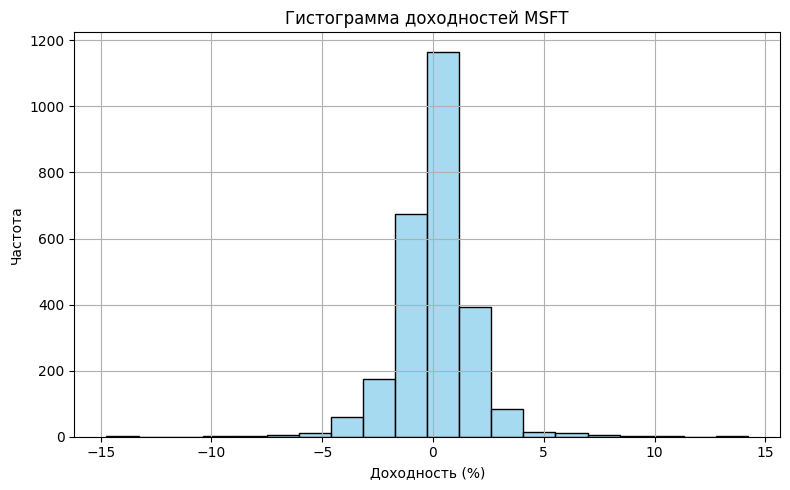

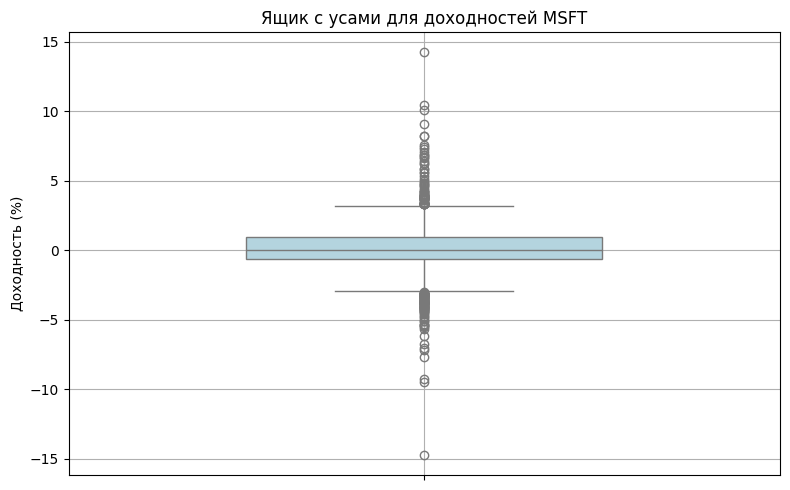

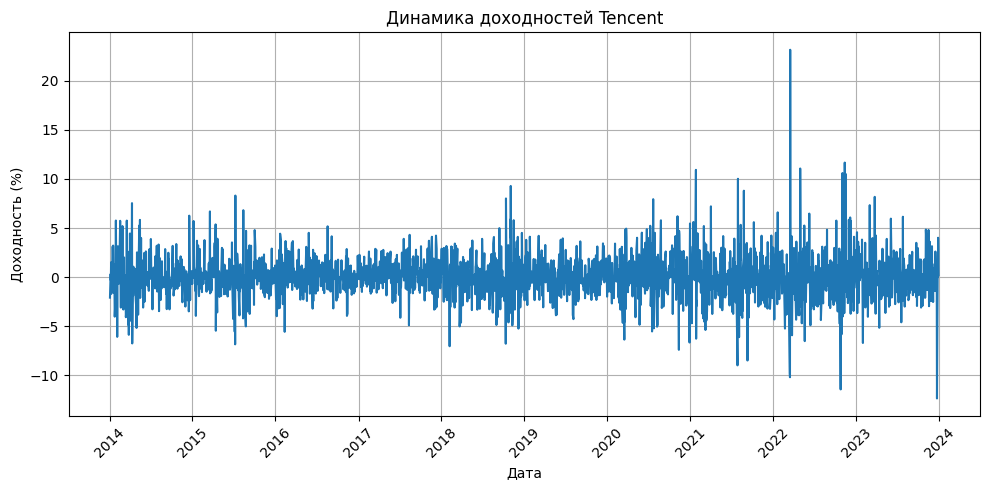

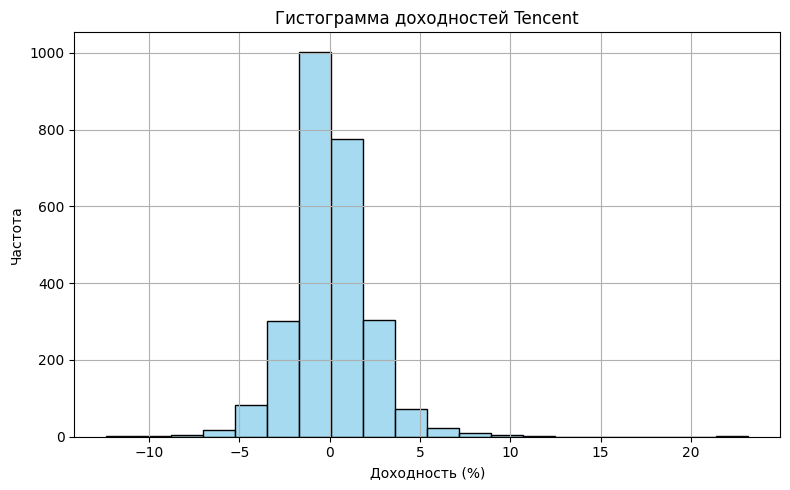

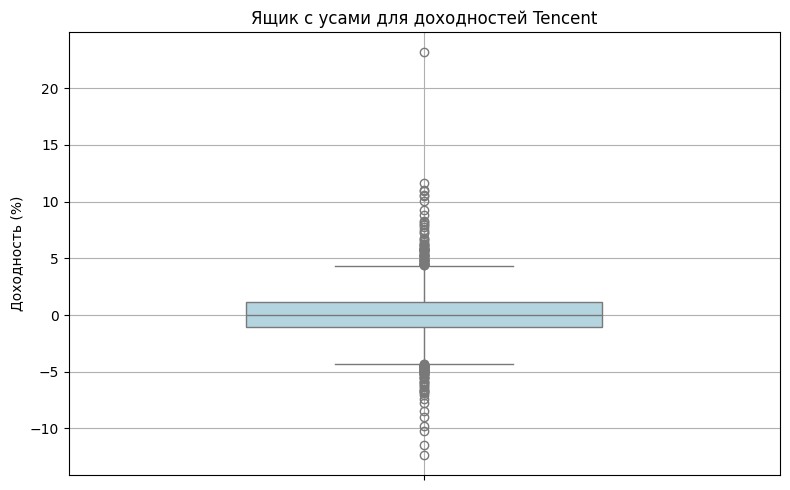

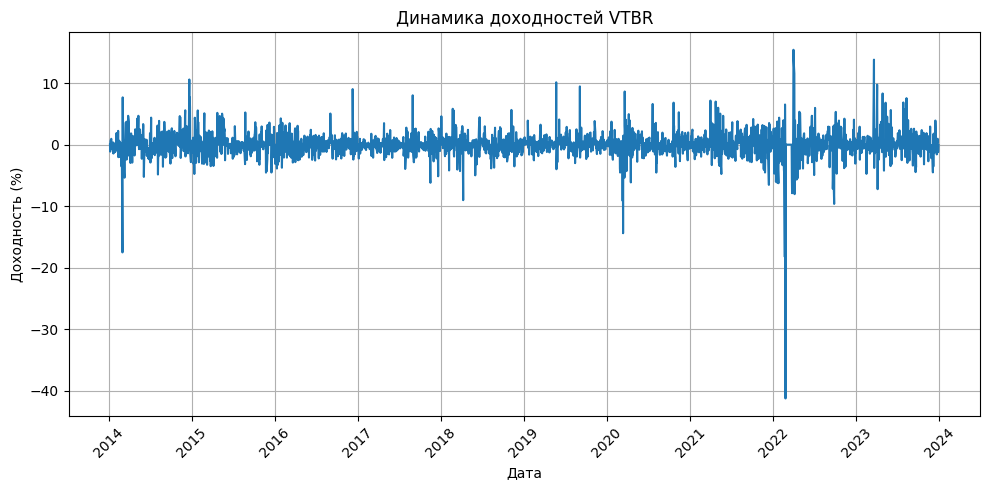

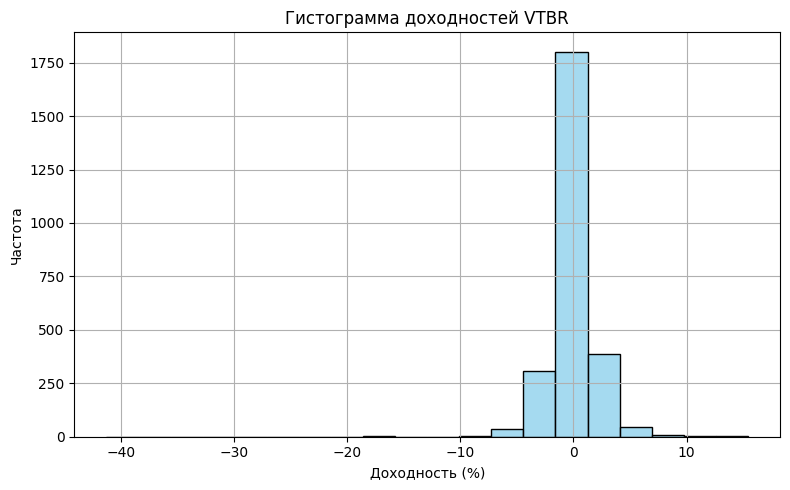

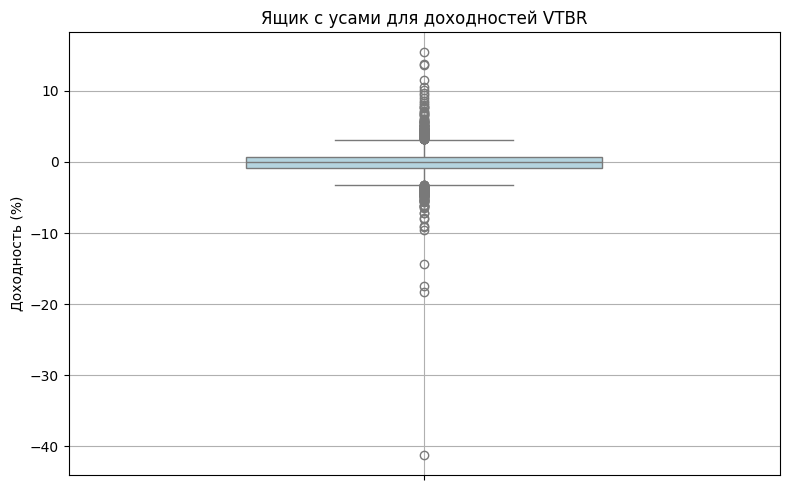

In [324]:
for ticker in df_pct_change.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df_pct_change.index, df_pct_change[ticker], linestyle='-')
    plt.title(f'Динамика доходностей {ticker}')
    plt.xlabel('Дата')
    plt.ylabel('Доходность (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.histplot(df_pct_change[ticker], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма доходностей {ticker}')
    plt.xlabel('Доходность (%)')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_pct_change[ticker], color='lightblue', width=0.5)
    plt.title(f'Ящик с усами для доходностей {ticker}')
    plt.ylabel('Доходность (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

__к) [5 баллов]__  В пункте __д)__ мы нашли даты, в которые наблюдались наибольшие измения стоимости ценых бумаг. При расчётах мы проигнорировали колебания курсов валют.

Давайте посмотрим, каким бы было колебание цен акций в абсолютном выражении для дат из таблички `top_5_diff`, если бы мы учли изменения курсов валют.

В таблице `df_pct_change` все доходности измерены в рублях. Посчитайте для этой таблицы построчное среднее для абсолютных значений изменений.

In [325]:
df_pct_change['Изм. (RUB) %'] = df_pct_change.abs().mean(axis=1)
df_pct_change

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR,Изм. (RUB) %
Дата,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-2.177215,0.526694,NaN,0.129765,-0.672766,-2.083333,NaN,1.117955
2014-01-06,0.569358,-1.178852,NaN,-0.307792,-2.113248,0.323321,NaN,0.898514
2014-01-07,-0.720535,0.674780,0.000000,1.397465,0.774979,-0.322279,0.000000,0.555720
2014-01-08,0.622084,1.077199,1.372998,-0.304487,-1.785224,1.522737,-1.134957,1.117098
...,...,...,...,...,...,...,...,...
2023-12-25,0.000000,0.000000,-0.616941,0.000000,0.000000,0.000000,0.957563,0.224929
2023-12-26,-0.284091,0.000000,-0.055869,0.000000,0.021357,0.000000,-0.150895,0.073173
2023-12-27,0.051800,-0.238474,-0.708075,-0.286396,-0.157476,4.014599,-1.230570,0.955341


Оставьте только те даты, которые встречаются в `top_5_diff`, и добавить их в качестве нового столбца `'Изм. (RUB) %'`

__Hint__: Чтобы выделить список необходимых дат из таблички `top_5_diff`, можно воспользоваться методом `to_list()` применительно к столбцу `'Дата'`. Такой список можно дальше использовать при обращении к строкам в `'[...]'`.

In [326]:
top_5_diff['Изм. (RUB) %'] = df_pct_change['Изм. (RUB) %'][top_5_diff['Дата'].tolist()].values
top_5_diff

,Дата,Изм. %,Изм. (RUB) %
0,2022-02-24,13.081429,13.079792
1,2016-02-29,11.840000,1.149333
2,2020-03-24,10.795714,10.795263
3,2020-03-12,10.615714,10.617117
4,2022-02-21,9.128000,6.520991


__л) [2 балла]__  Проинтерпретируете уменьшение/увеличение процентного изменения стоимости акций при пересчете по курсу в рубли.

__Ответ:__ в 3 случаях ничего, по сути, не поменялось. Изменение примерно то же. В 2 случаях изменение в рублях сильно упало. Это значит, что в этот день курс рубля вырос.

## 3 Составляем портфель


Финансовые продукты описываются двумя характеристиками: __доходностью__ и __риском__.

Доходность — это процентное изменение стоимости за некоторый промежуток времени. Под риском, как правило, понимается стандартное отклонение доходности акций.

Однако когда речь идет о нескольких акциях в портфеле, то необходимо учитывать, как связана динамика цен на эти акции: падение доходности одной из акций может быть компенсировано ростом другой. Такой портфель будет предпочтительнее, поскольку предлагает меньшие риски для инвестора.

Осталось найти то самое сладкое сочетание активов... Для поиска оптимальных весов активов в портфеле обычно решается __задача оптимизации.__

Мы поступим проще:

- Будем рассматривать портфель, состоящий всего из 2 тикеров: `'AAPL'` и `'Tencent'`.
- Наилучшее сочетание весов будем искать неоптимальным способом, тупо перебирая различные варианты.

Пусть мы вкладываем долю нашего бюджета $w$ в первую ценную бумагу, а долю $(1 - w)$ во вторую. Тогда ожидаемая доходность порфеля составит

$$
\mathbb{E}(R) = w \cdot \mathbb{E}(R_1)  + (1 - w) \cdot \mathbb{E}(R_2).
$$

Дисперсия портфеля будет равна

$$
\text{Var}(R) = w^2 \cdot \text{Var}(R_1)  + (1 - w)^2 \cdot \text{Var}(R_2) + 2 \cdot w \cdot \text{Cov}(R_1, R_2).
$$

Ковариацию, по её определению, можно переписать как

$$
\text{Cov}(R_1, R_2) = \text{Corr}(R_1, R_2) \cdot \sigma(R_1) \cdot \sigma(R_2),
$$

где $\sigma(R_i) = \sqrt{ \text{Var}(R_i)}$.


Для начала создадим веса, которые будем рассматривать.

__а) [2 балла]__ С помощью функции `np.arange()` создайте `array` от $0$ до $1$ с шагом $0.01$ [(ссылка на документацию).](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [220]:
w = np.arange(0, 1.01, 0.01)

Теперь запишем необходимые характеристики акций в соответствующие переменные:

__б) [3 балла]__ В переменные `r1` и `r2` сохраните среднюю доходность акций `'AAPL'` и `'Tencent'` из `df_pct_change`. Убедитесь, что доходности представлены не в процентах, а в виде чисел. Например не $10\%$, а $0.1$.

Кроме того, поскольку стандартной мерой доходности является годовая доходность, преобразуем среднюю ежедневную доходность в годовую, используя формулу сложного процента для полученных значений:

$$
r_{\text{год}} = (1 + r_{\text{день}})^{252} - 1,
$$

где:
- $r_{\text{год}}$ - ожидаемая годовая доходность,
- $r_{\text{день}}$ - средняя ежедневная доходность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

In [328]:
r1 = (1 + df_pct_change['AAPL'].mean()/100) ** 252 - 1
r2 = (1 + df_pct_change['Tencent'].mean()/100) ** 252 - 1
r1,r2

(0.29572597527711864, 0.18005362519308465)

__в) [3 балла]__ Аналогично сохраните стандартные отклонения доходности этих акций в `sd1` и `sd2`. Преобразуйте эти значения из дневных в годовые:

$$
\sigma_{\text{год}} = \sigma_{\text{день}} \times \sqrt{252}
$$

Где:
- $\sigma_{\text{год}}$ - годовая волатильность,
- $\sigma_{\text{день}}$ - ежедневная волатильность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

Эта формула основана на предположении, что ежедневные доходности распределены независимо и одинаково. В реальности рыночные условия могут влиять на точность этого преобразования, но это общепринятый метод для оценки годовой волатильности на основе ежедневных данных.

In [263]:
sd1 = (df_pct_change['AAPL'] / 100).std() * np.sqrt(252)
sd2 = (df_pct_change['Tencent'] / 100).std() * np.sqrt(252)
sd1, sd2

(0.27895357387997366, 0.3460358734230746)

__в) [1 балл]__ В переменную `rho` сохраните корреляцию между акциями.

In [329]:
rho = df_pct_change[['AAPL', 'Tencent']].corr().iloc[0, 1]
rho

0.13136730928555365

Теперь посчитаем доходность и волатильность портфеля, используя соответствующие формулы

In [265]:
r_p2 = w * r1 +(1 - w) * r2
sd_p2 = np.sqrt(w**2 * sd1**2 + (1 - w)**2 * sd2**2 + 2 * w * (1 - w) * rho * sd1 * sd2)

__г) [5 баллов]__ Постройте линейный график в осях (`sd_p2`, `r_p2`)

__Hint:__ Можно сделать с помощью `plt.plot(x, y)`

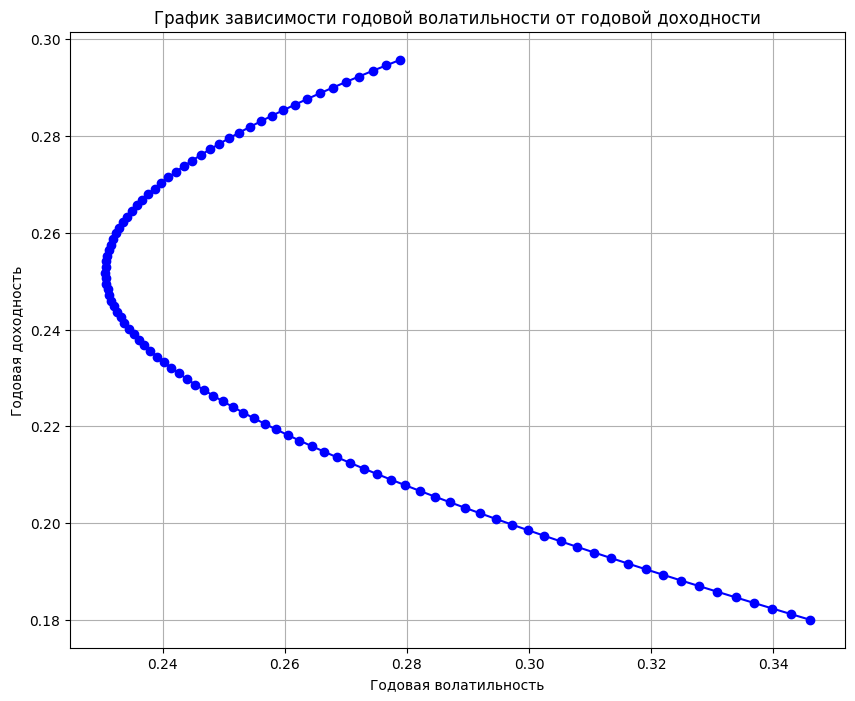

In [266]:
plt.figure(figsize=(10, 8))
plt.plot(sd_p2, r_p2, marker='o', linestyle='-', color='b')
plt.title('График зависимости годовой волатильности от годовой доходности')
plt.xlabel('Годовая волатильность')
plt.ylabel('Годовая доходность')
plt.grid(True)
plt.show()

Получившаяся у вас картинка должна быть похожа на такую:

<center>
<img src="https://investprofit.info/wp-content/uploads/2018/08/Frontier1.png" height="450">
</center>

В портфельной теории Марковица эта кривая называется эффективной границей (или кривой эффективностию). Её можно поделить на три зоны:

- **Эффективная граница (Efficient Frontier)** — это часть кривой, которая лежит выше портфеля с минимальной дисперсией (риском). Портфели на этом участке предлагают наилучшее сочетание риска и доходности. Другими словами, для любого данного уровня риска, портфели на эффективной границе предлагают максимальную возможную доходность.
- **Портфели ниже эффективной границы** считаются неэффективными, так как для того же уровня риска можно добиться большей доходности.
- **Портфели выше эффективной границы** обычно не существуют, так как они предполагали бы получение более высокой доходности при том же уровне риска.

Найдем портфель с минимальной дисперсией (риском).

__д) [3 балла]__ Для этого сначала создадим табличку со столбцами `'Вес'`, `'Риск'` и `'Доходность'` (содержащими `w`, `sd_p2` и `r_p2` соответственно)

In [267]:
df_r = pd.DataFrame({'Вес': w, 'Риск': sd_p2, 'Доходность': r_p2})

df_r.head()

,Вес,Риск,Доходность
0,0.00,0.346036,0.180054
1,0.01,0.342953,0.181210
2,0.02,0.339893,0.182367
3,0.03,0.336856,0.183524
4,0.04,0.333844,0.184681


__е) [3 балла]__ Теперь найдем портфель с минимальным риском и запишем его в переменную `min_sd_p`, а само значение минимального риска в `min_sd`

In [331]:
min_sd = df_r.loc[df_r['Риск'].idxmin()]
min_sd_p = min_sd['Риск']
min_sd_p

0.2306031323325654

__ж) [3 балла]__ Выберем множество эффективных портфелей из `df_r`, тех, чья доходность и риск выше, чем у `min_sd_p` и сохраним их в `df_eff_p`

In [269]:
df_eff_p = df_r[(df_r['Доходность'] > min_sd['Доходность']) & (df_r['Риск'] > min_sd_p)]

__з) [3 балла]__ А теперь на основе `df_eff_p` построим эффективную границу, о которой шла речь раньше (часть кривой выше портфеля с наименьшей волатильностью)

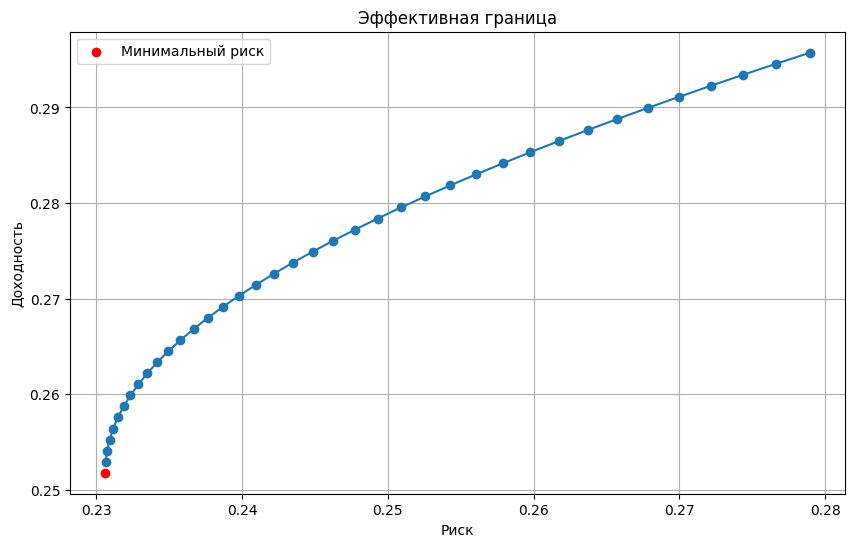

In [270]:
plt.figure(figsize=(10, 6))
plt.plot(df_eff_p['Риск'], df_eff_p['Доходность'], marker='o', linestyle='-')
plt.scatter(min_sd['Риск'], min_sd['Доходность'], color='red', label='Минимальный риск')
plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Эффективная граница')
plt.legend()
plt.grid(True)
plt.show()

Выше мы говорили, что для поиска оптимального портфеля необходимо решать задачу оптимизации. Целевую функцию для её решения можно определить по-разному. Выше мы занимались минимизацией риска и нашли `min_sd_p`.

Кроме минимизации риска можно попытаться максимизировать **коэффициент Шарпа.** Он рассчитывается по формуле

$$
SR = \frac{r_{p} - r_{f}}{\sigma_{p}},
$$

где $r_{p}$  —  ожидаемая доходность портфеля, $r_{f}$  —  безрисковая ставка доходности, $\sigma_{p}$ — стандартное отклонение доходности портфеля.

Коэффициент Шарпа отражает премию за принятый риск. Любая инвестиционная стратегия, демонстрирующая более крутой наклон кривой Шарпа, предлагает более высокую ожидаемую доходность для данного уровня риска. Следовательно, более высокий коэффициент Шарпа всегда предпочтительнее, независимо от того, какой уровень риска вы готовы принять.

В качестве безрисковой ставки доходности выберем доходность российских государственных облигаций сроком 10 лет (можно посмотреть [тут](https://cbr.ru/hd_base/zcyc_params/))

In [283]:
r_f = 11.8/100

__и) [3 балла]__ Теперь у нас есть возможность рассчитать коэффициент Шарпа для кадждого портфеля в `df_r`. Для этого необходимо вычесть из доходности портфеля безрисковую ставку (`r_f`) и разделить на волатильность (риск) портфеля. Сохраните полученные значения в столбец `'Sharp'` таблицы `df_r`

In [284]:
df_r['Sharp'] = (df_r['Доходность'] - r_f)/df_r['Риск']

__и) [3 балла]__ Определите портфель с максимальным коэффициентом Шарпа, сохраните его в переменную `max_sharp_p`, а значение самого коэффициента - в переменную `max_sharp`

In [285]:
max_sharp_p = df_r.loc[df_r['Sharp'].idxmax()]
max_sharp = max_sharp_p['Sharp']
max_sharp

0.6443765869175386

Рассмотрим прямую в осях (Риск - Доходность), выраженную формулой

$$ r = max\_sharp \cdot \sigma + r_f $$

Для того, чтобы ее провести, нам необходимо задать хотя бы 2 точки. Чтобы построенный график хорошо выглядел, рассмотрим $\sigma$, равную:

1. наименьшему значению риска портфелей на эффективной кривой (`min_sd`)
2. значению риска, соответствующего портфелю с наибольшим значением коэффициента Шарпа (из `max_sharp_p`)

__к) [3 балла]__ В переменную `sigma` сохраните `numpy.array` с двумя перечисленными выше значениями

In [286]:
sigma = np.array([min_sd_p, max_sharp_p['Риск']])

__л) [3 балла]__ В переменную `r` сохраните значения доходности, находящиеся на указанной прямой, для значений риска из `sigma` (необходимо использовать формулу прямой)

In [287]:
r = max_sharp * sigma + r_f

__м) [5 баллов]__ Теперь построим эффективную границу, что мы уже делали ранее, и проведем указанную прямую (вернее ее часть).

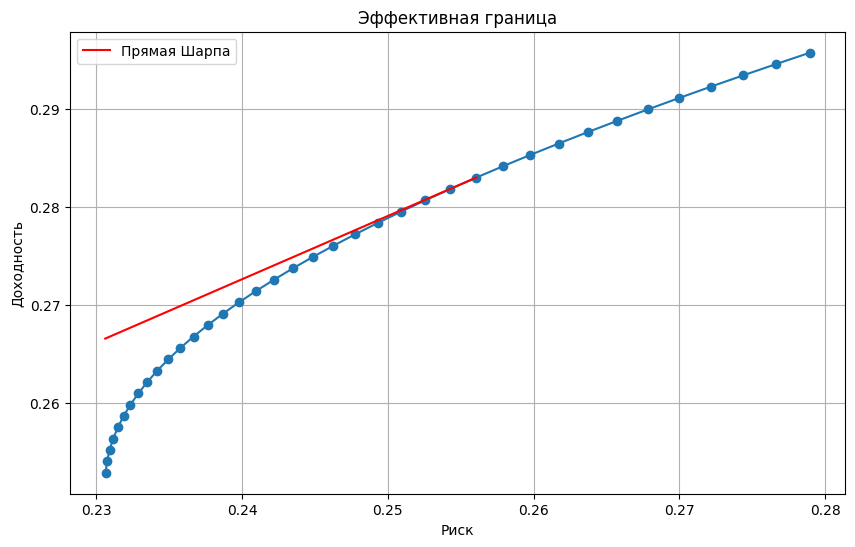

In [290]:
plt.figure(figsize=(10, 6))
plt.plot(df_eff_p['Риск'], df_eff_p['Доходность'], marker='o')
plt.plot(sigma, r, label='Прямая Шарпа', color='red')
plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Эффективная граница')
plt.legend()
plt.grid(True)
plt.show()

Полученная прямая является касательной к эффективной кривой, а точка ее касания представляет собой так называемый тангенциальный портфель.

Каждая точка на прямой Шарпа представляет собой портфель, состоящий из комбинации безрискового актива (в нашем случае, государственных облигаций) и рыночного портфеля (здесь, сочетание двух акций).

Все портфели на прямой Шарпа считаются эффективными в смысле оптимального соотношения риска и доходности. Это означает, что для любого данного уровня риска портфель на этой линии предоставляет максимально возможную доходность.

__н) [3 балла]__ Проинтерпретируйте численное значение наибольшего коэффициента Шарпа (`max_sharp`)

**Ответ:** Мы получили, что наибольшее значение коэффициента Шарпа равно 0.6443765869175386. Это значит, что за каждую единицу риска можно получить доходность в размере 0.644. Кажется, это очень низкое значение, и подобные вложения - не лучшие.

Это может объясняться тем, что за безрисковую ставку мы берем доходность по 10-летним российским ОФЗ, а рассмартиваем мы мировой рынок, где доходность 11.8% - это очень много. 

Если мы возьмем за безрисковую ставку, например, процент по американским гос облигациям, то коэффициент Шарпа вырастет, и этот результат будет более релевантным. 

С другой стороны, мы смотрим доходность в рублях, поэтому ставка по ОФЗ является лучшим вариантом безрискового актива.

Таким образом, мы немного углубились в портфельную теорию и рассмотрели 2 основных метода оптимизации структуры портфеля:
- поиск наименее волатильного (рискового) портфеля
- поиск портфеля с оптимальным соотношением доходности и риска.